references:
https://www.kaggle.com/rishabhchaurasia7/image-captioning-on-flickr8k-dataset

## Image Captioning 



In [23]:
# Importing the Required Libraries

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.preprocessing import image
import time
import pickle
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import *
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu

###1- Data Preprocessing

In [ ]:
#loading dataset on drive
from google.colab import drive
drive.mount('/content/drive')

In [39]:
#loading the captions.txt and preprocessing
dataset = pd.read_csv('/content/drive/MyDrive/flickr8kdata/captions.txt',delimiter=',',header=None)
dataset=dataset[1:]

In [40]:
#dataset shape
print(dataset.shape)

(40455, 2)


In [41]:
#first five rows of dataset
dataset.head()

0                                                  1
1  1000268201_693b08cb0e.jpg  A child in a pink dress is climbing up a set o...
2  1000268201_693b08cb0e.jpg              A girl going into a wooden building .
3  1000268201_693b08cb0e.jpg   A little girl climbing into a wooden playhouse .
4  1000268201_693b08cb0e.jpg  A little girl climbing the stairs to her playh...
5  1000268201_693b08cb0e.jpg  A little girl in a pink dress going into a woo...

In [43]:
# Libraries to be used for data cleaning

import re
import nltk

#defining the dataset corpus
corpus = []
for i in range(1, dataset.shape[0]):
    cap = re.sub('[^a-zA-Z]', ' ', dataset[1][i])  #Removed all other characters except alphabets
    cap = cap.lower()                              #Converted to lower case
    cap = cap.split()                               
    cap=[word for word in cap if len(word)>1]      #Removed single letter words
    cap = ' '.join(cap)                            # Joined with spaces
    cap= '<startseq> '+cap+' <endseq>'
    corpus.append(cap)                             #list of captions

In [44]:
for i in range(50): print(corpus[i:i+1])
print(len(corpus))

['<startseq> child in pink dress is climbing up set of stairs in an entry way <endseq>']
['<startseq> girl going into wooden building <endseq>']
['<startseq> little girl climbing into wooden playhouse <endseq>']
['<startseq> little girl climbing the stairs to her playhouse <endseq>']
['<startseq> little girl in pink dress going into wooden cabin <endseq>']
['<startseq> black dog and spotted dog are fighting <endseq>']
['<startseq> black dog and tri colored dog playing with each other on the road <endseq>']
['<startseq> black dog and white dog with brown spots are staring at each other in the street <endseq>']
['<startseq> two dogs of different breeds looking at each other on the road <endseq>']
['<startseq> two dogs on pavement moving toward each other <endseq>']
['<startseq> little girl covered in paint sits in front of painted rainbow with her hands in bowl <endseq>']
['<startseq> little girl is sitting in front of large painted rainbow <endseq>']
['<startseq> small girl in the grass

In [45]:
i=1
while i < dataset.shape[0]:
  dataset[0][i]=dataset[0][i].split('.')[0]        #Removed characters after '.'
  i=i+1

In [46]:
print(dataset.head)

<bound method NDFrame.head of                               0                                                  1
1         1000268201_693b08cb0e  A child in a pink dress is climbing up a set o...
2         1000268201_693b08cb0e              A girl going into a wooden building .
3         1000268201_693b08cb0e   A little girl climbing into a wooden playhouse .
4         1000268201_693b08cb0e  A little girl climbing the stairs to her playh...
5         1000268201_693b08cb0e  A little girl in a pink dress going into a woo...
...                         ...                                                ...
40451      997722733_0cb5439472           A man in a pink shirt climbs a rock face
40452      997722733_0cb5439472           A man is rock climbing high in the air .
40453      997722733_0cb5439472  A person in a red shirt climbing up a rock fac...
40454      997722733_0cb5439472                    A rock climber in a red shirt .
40455  997722733_0cb5439472.jpg  A rock climber practices

In [47]:
type(dataset)

pandas.core.frame.DataFrame

In [48]:
# Joins the Images to its captions using a dictionary 

from collections import defaultdict
new_dict= defaultdict(lambda : [])          #Created a dictionary with image ids as key and captions as value
i=1
while i <len(corpus):
  # print(dataset[0][i])
  new_dict[dataset[0][i]].append(corpus[i-1])
  i=i+1                                                     

In [49]:
print(len(new_dict))

8091


In [50]:
all_vocab = []              #A list of all the words in the captions

for key in new_dict.keys():
    [ all_vocab.append(i) for des in new_dict[key] for i in des.split()]

In [51]:
print("total words appearing : " , len(all_vocab))

total words appearing :  454697


Creating a word counter for the corpus

In [52]:
from collections import Counter

counter = Counter(all_vocab)

In [53]:
dic_ = dict(counter)

In [54]:
sorted_dic = sorted(dic_.items(), key = lambda x: x[1], reverse=True)   #List with words and their corresponding frequency

In [55]:
print(len(sorted_dic))

8426


In [56]:

for i in range(len(sorted_dic)):print(sorted_dic[i]) 

Streaming output truncated to the last 5000 lines.
('transit', 3)
('claps', 3)
('reflections', 3)
('crib', 3)
('expanse', 3)
('source', 3)
('renaissance', 3)
('crouch', 3)
('dogsled', 3)
('signing', 3)
('retaining', 3)
('views', 3)
('labeled', 3)
('symbol', 3)
('trekking', 3)
('squinting', 3)
('tired', 3)
('kissed', 3)
('attraction', 3)
('sunshine', 3)
('crocs', 3)
('labs', 3)
('donut', 3)
('yorkie', 3)
('bounced', 3)
('backed', 3)
('memorial', 3)
('ink', 3)
('burgundy', 3)
('squeeze', 3)
('mannequins', 3)
('carved', 3)
('overgrown', 3)
('goth', 3)
('collection', 3)
('setter', 3)
('tether', 3)
('fives', 3)
('downward', 3)
('shake', 3)
('finished', 3)
('demonstrates', 3)
('lemonade', 3)
('peek', 3)
('strikes', 3)
('peaceful', 3)
('solitary', 3)
('opened', 3)
('hide', 3)
('plains', 3)
('favorite', 3)
('sloping', 3)
('sippy', 3)
('sipping', 3)
('egret', 3)
('seem', 3)
('microphones', 3)
('pistol', 3)
('tussling', 3)
('drapped', 3)
('boot', 3)
('lobster', 3)
('gaze', 3)
('fangs', 3)
('inte

In [57]:
# we decide upon a threshold value which helps in selecting the words that occur more than others in the corpus
# Here we choose a threshold of 10, so that words that occur more than 10 times in the entire corpus are chosen

threshold_value = 10

d = [(x) for x in sorted_dic if x[1]>threshold_value]

In [58]:
len(d)

1847

In [59]:
all_vocab = [x[0] for x in d]                       #Updating all_vocab

In [60]:
len(all_vocab)

1847

In [61]:
f = open('new_dict.txt', 'w')
f.write(str(new_dict))
f.close()

### 2-Splitting image captions dataset to train and test 

In [62]:
image_ids=[]
j=1
for i in range(0,len(dataset)//5 ):
    image_ids.append(dataset[0][j])
    j=j+5
    

In [63]:
print(image_ids)

['1000268201_693b08cb0e', '1001773457_577c3a7d70', '1002674143_1b742ab4b8', '1003163366_44323f5815', '1007129816_e794419615', '1007320043_627395c3d8', '1009434119_febe49276a', '1012212859_01547e3f17', '1015118661_980735411b', '1015584366_dfcec3c85a', '101654506_8eb26cfb60', '101669240_b2d3e7f17b', '1016887272_03199f49c4', '1019077836_6fc9b15408', '1019604187_d087bf9a5f', '1020651753_06077ec457', '1022454332_6af2c1449a', '1022454428_b6b660a67b', '1022975728_75515238d8', '102351840_323e3de834', '1024138940_f1fefbdce1', '102455176_5f8ead62d5', '1026685415_0431cbf574', '1028205764_7e8df9a2ea', '1030985833_b0902ea560', '103106960_e8a41d64f8', '103195344_5d2dc613a3', '103205630_682ca7285b', '1032122270_ea6f0beedb', '1032460886_4a598ed535', '1034276567_49bb87c51c', '104136873_5b5d41be75', '1042020065_fb3d3ba5ba', '1042590306_95dea0916c', '1045521051_108ebc19be', '1048710776_bb5b0a5c7c', '1052358063_eae6744153', '105342180_4d4a40b47f', '1053804096_ad278b25f1', '1055623002_8195a43714', '1055753

In [64]:
new_dict[image_ids[0]]

['<startseq> child in pink dress is climbing up set of stairs in an entry way <endseq>',
 '<startseq> girl going into wooden building <endseq>',
 '<startseq> little girl climbing into wooden playhouse <endseq>',
 '<startseq> little girl climbing the stairs to her playhouse <endseq>',
 '<startseq> little girl in pink dress going into wooden cabin <endseq>']

In [65]:
#train test split 80%-20%
split_train_to_test_ratio=0.8
train_end=int(split_train_to_test_ratio*len(image_ids))

train=image_ids[0:train_end]
test=image_ids[train_end:]

In [66]:
#train image ids
train

['1000268201_693b08cb0e',
 '1001773457_577c3a7d70',
 '1002674143_1b742ab4b8',
 '1003163366_44323f5815',
 '1007129816_e794419615',
 '1007320043_627395c3d8',
 '1009434119_febe49276a',
 '1012212859_01547e3f17',
 '1015118661_980735411b',
 '1015584366_dfcec3c85a',
 '101654506_8eb26cfb60',
 '101669240_b2d3e7f17b',
 '1016887272_03199f49c4',
 '1019077836_6fc9b15408',
 '1019604187_d087bf9a5f',
 '1020651753_06077ec457',
 '1022454332_6af2c1449a',
 '1022454428_b6b660a67b',
 '1022975728_75515238d8',
 '102351840_323e3de834',
 '1024138940_f1fefbdce1',
 '102455176_5f8ead62d5',
 '1026685415_0431cbf574',
 '1028205764_7e8df9a2ea',
 '1030985833_b0902ea560',
 '103106960_e8a41d64f8',
 '103195344_5d2dc613a3',
 '103205630_682ca7285b',
 '1032122270_ea6f0beedb',
 '1032460886_4a598ed535',
 '1034276567_49bb87c51c',
 '104136873_5b5d41be75',
 '1042020065_fb3d3ba5ba',
 '1042590306_95dea0916c',
 '1045521051_108ebc19be',
 '1048710776_bb5b0a5c7c',
 '1052358063_eae6744153',
 '105342180_4d4a40b47f',
 '1053804096_ad278b25

In [67]:
train_descriptions = {}               #dictionary with keys as image ids and values as corresponding captions
for t in train:
    train_descriptions[t] = []
    for cap in new_dict[t]:
        train_descriptions[t].append(cap)

In [68]:
test_descriptions = {}             #dictionary with keys as image ids and values as corresponding captions
for t in test:
    test_descriptions[t] = []
    for cap in new_dict[t]:
        test_descriptions[t].append(cap)

In [69]:
#train descriptions
train_descriptions

{'1000268201_693b08cb0e': ['<startseq> child in pink dress is climbing up set of stairs in an entry way <endseq>',
  '<startseq> girl going into wooden building <endseq>',
  '<startseq> little girl climbing into wooden playhouse <endseq>',
  '<startseq> little girl climbing the stairs to her playhouse <endseq>',
  '<startseq> little girl in pink dress going into wooden cabin <endseq>'],
 '1001773457_577c3a7d70': ['<startseq> black dog and spotted dog are fighting <endseq>',
  '<startseq> black dog and tri colored dog playing with each other on the road <endseq>',
  '<startseq> black dog and white dog with brown spots are staring at each other in the street <endseq>',
  '<startseq> two dogs of different breeds looking at each other on the road <endseq>',
  '<startseq> two dogs on pavement moving toward each other <endseq>'],
 '1002674143_1b742ab4b8': ['<startseq> little girl covered in paint sits in front of painted rainbow with her hands in bowl <endseq>',
  '<startseq> little girl is 

In [ ]:
test_descriptions#test decriptions

{'3601569729_bf4bf82768': ['<startseq> group of race horses run down track carrying jockeys <endseq>',
  '<startseq> horse race <endseq>',
  '<startseq> jockeys on horses during race <endseq>',
  '<startseq> the horses race on the dirt track while their riders urge them on <endseq>',
  '<startseq> there are riders and horses in horse race going around track <endseq>'],
 '3601803640_5f3cb05acf': ['<startseq> man and woman kissing <endseq>',
  '<startseq> man and woman kissing in front of crowd of people <endseq>',
  '<startseq> man is kissing woman <endseq>',
  '<startseq> young couple kiss while crowd mills in the background on sunny day <endseq>',
  '<startseq> two people kiss near crowd <endseq>'],
 '3601843201_4809e66909': ['<startseq> man racing on motorbike <endseq>',
  '<startseq> motorcycle rider drives fast around curve on track <endseq>',
  '<startseq> person wearing red and white uniform is racing motorcycle with the number on it <endseq>',
  '<startseq> red and white motorcy

In [70]:
i=0
for keys,values in train_descriptions.items():
 i=i+1
 
 print(keys)
 print(values)
 if i>50:break

1000268201_693b08cb0e
['<startseq> child in pink dress is climbing up set of stairs in an entry way <endseq>', '<startseq> girl going into wooden building <endseq>', '<startseq> little girl climbing into wooden playhouse <endseq>', '<startseq> little girl climbing the stairs to her playhouse <endseq>', '<startseq> little girl in pink dress going into wooden cabin <endseq>']
1001773457_577c3a7d70
['<startseq> black dog and spotted dog are fighting <endseq>', '<startseq> black dog and tri colored dog playing with each other on the road <endseq>', '<startseq> black dog and white dog with brown spots are staring at each other in the street <endseq>', '<startseq> two dogs of different breeds looking at each other on the road <endseq>', '<startseq> two dogs on pavement moving toward each other <endseq>']
1002674143_1b742ab4b8
['<startseq> little girl covered in paint sits in front of painted rainbow with her hands in bowl <endseq>', '<startseq> little girl is sitting in front of large painte

### 3-Importing and Loading InceptionV3

In [25]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

In [26]:
model = InceptionV3(weights = 'imagenet', input_shape = (299, 299,3))#inceptionv3

96116736/96112376 [==============================] - 1s 0us/step


In [27]:
model.summary()#model summary

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [30]:
model_new = Model(inputs = model.input, outputs =  model.layers[-2].output)#removing the softmax

###4- Image Preprocessing
We take the train & test image datasets and preprocess them.

In [ ]:
pip install pillow#installing pillow

In [21]:
# function to preprocess images
from PIL import Image
import numpy as np   

def preprocess_image(img):
    img = Image.open(img)
    img=img.resize((299,299))#size that fits the inceptionv3 input sahpe
    img = np.asarray(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis = 0)

    return img


In [24]:
# function for obtaining feature vectors (encodings) from images

def encode_image(img):
    img = preprocess_image(img)
    fea_vec = model_new.predict(img)
    fea_vec = fea_vec.reshape(fea_vec.shape[1], )
    return fea_vec

In [ ]:
#loading images from drive
images='/content/drive/MyDrive/flickr8kdata/Images/'

In [ ]:
 # Obtaining Feature vector from training images
 from PIL import Image
 
start = time.time()

encoding_train = {}                #Dictionary with keys as image ids and values as encoding corresponding to the images                        

for ix, img in enumerate(train):
    
    img = images+train[ix]+".jpg"
    
    p = encode_image(img)
    
    encoding_train[ img[len(images):] ] = p
    
    
    if ix%100 == 0:
        print("Encoding image :" + str(ix))
    
print("Time taken in sec - " + str(time.time() - start))

Encoding image :0
Encoding image :100
Encoding image :200
Encoding image :300
Encoding image :400
Encoding image :500
Encoding image :600
Encoding image :700
Encoding image :800
Encoding image :900
Encoding image :1000
Encoding image :1100
Encoding image :1200
Encoding image :1300
Encoding image :1400
Encoding image :1500
Encoding image :1600
Encoding image :1700
Encoding image :1800
Encoding image :1900
Encoding image :2000
Encoding image :2100
Encoding image :2200
Encoding image :2300
Encoding image :2400
Encoding image :2500
Encoding image :2600
Encoding image :2700
Encoding image :2800
Encoding image :2900
Encoding image :3000
Encoding image :3100
Encoding image :3200
Encoding image :3300
Encoding image :3400
Encoding image :3500
Encoding image :3600
Encoding image :3700
Encoding image :3800
Encoding image :3900
Encoding image :4000
Encoding image :4100
Encoding image :4200
Encoding image :4300
Encoding image :4400
Encoding image :4500
Encoding image :4600
Encoding image :4700
Enco

In [ ]:
len(encoding_train)

6472

In [ ]:
encoding_train[train[0]+".jpg"]

array([0.09671363, 0.2295713 , 0.7610037 , ..., 0.41570723, 0.45861274,
       0.40678236], dtype=float32)

In [ ]:
print("Time taken in sec - " + str(time.time() - start))

Time taken in sec - 3618.5629806518555


In [ ]:
 # Obtaining Feature vector from test images

start = time.time()

encoding_test = {}

for ix, img in enumerate(test):
    
    img = images+test[ix]+".jpg"
    
    p = encode_image(img)
    
    encoding_test[ img[len(images):] ] = p
    
    
    if ix%100 == 0:
        print("Encoding image :" + str(ix))
    
print("Time taken in sec - " + str(time.time() - start))

Encoding image :0
Encoding image :100
Encoding image :200
Encoding image :300
Encoding image :400
Encoding image :500
Encoding image :600
Encoding image :700
Encoding image :800
Encoding image :900
Encoding image :1000
Encoding image :1100
Encoding image :1200
Encoding image :1300
Encoding image :1400
Encoding image :1500
Encoding image :1600
Time taken in sec - 923.0978491306305


In [ ]:
# saving features to disk

with open("./encoded_train_images.pkl", 'wb') as f:
    pickle.dump(encoding_train, f )

In [ ]:
with open("./encoded_test_images.pkl", 'wb') as f:
    pickle.dump(encoding_test, f )

In [ ]:
with open("./encoded_train_images.pkl", 'rb') as f:
    encoding_train = pickle.load(f)

In [ ]:
with open("./encoded_test_images.pkl", 'rb') as f:
    encoding_test = pickle.load(f)

**Captions**

In [76]:
word_to_idx = {}
idx_to_word = {}

ix = 1

for e in all_vocab:
    #print(ix,e)
    word_to_idx[e] = ix
    idx_to_word[ix] = e
    ix +=1

In [77]:
i=0
for keys,values in word_to_idx.items():
 i=i+1
 
 print(keys,values)
 
 if i>50:break

<startseq> 1
<endseq> 2
in 3
the 4
on 5
is 6
and 7
dog 8
with 9
man 10
of 11
two 12
white 13
black 14
boy 15
are 16
woman 17
girl 18
to 19
wearing 20
at 21
people 22
water 23
red 24
young 25
brown 26
an 27
his 28
blue 29
dogs 30
running 31
through 32
playing 33
while 34
shirt 35
down 36
standing 37
ball 38
little 39
grass 40
snow 41
child 42
person 43
jumping 44
over 45
three 46
front 47
sitting 48
holding 49
up 50
field 51


In [78]:
for i in range(51):print(all_vocab[i])

<startseq>
<endseq>
in
the
on
is
and
dog
with
man
of
two
white
black
boy
are
woman
girl
to
wearing
at
people
water
red
young
brown
an
his
blue
dogs
running
through
playing
while
shirt
down
standing
ball
little
grass
snow
child
person
jumping
over
three
front
sitting
holding
up
field


In [79]:
len(all_vocab)

1847

In [80]:
vocab_size = len(idx_to_word) + 1
print(vocab_size)


1848


In [81]:
all_caption_len = []

for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        all_caption_len.append(len(cap.split()))

In [82]:
print(len(all_caption_len))
print(all_caption_len[:50])

32360
[16, 7, 8, 10, 11, 9, 15, 18, 14, 10, 18, 12, 19, 13, 11, 12, 14, 16, 11, 13, 10, 9, 11, 11, 14, 7, 8, 12, 12, 11, 15, 11, 9, 15, 11, 14, 14, 14, 14, 16, 11, 18, 8, 17, 21, 7, 9, 8, 14, 9]


In [83]:
max_len = max(all_caption_len)
print(max_len) 

35


### 5-Generator Function
The Data Generator maps the Image encodings with the training captions for the training of the model

In [ ]:

def data_generator(train_descriptions, encoding_train, word_to_idx, max_len,  num_photos_per_batch ):
    X1, X2, y = [], [], []
    
    n=0
    cnt = 0
    all_items = list(train_descriptions.keys())
    
    while True:
      n+=1
      # print(cnt)
      key = all_items[cnt]
      desc_list = train_descriptions[key]              
      cnt+=1
      cnt= (cnt%len(all_items))
        
      photo = encoding_train[key+".jpg"]          #feature vector
            #print(photo.shape)
      for desc in desc_list:                       #desc : iterates through the 5 captions
        seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx]                
                
        for i in range(1, len(seq)): 
            in_seq = seq[0:i]
            out_seq = seq[i]
            
            in_seq = pad_sequences( [in_seq], maxlen=max_len, value= 0, padding='post')[0]
        
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            
            X1.append(photo)
            X2.append(in_seq)
            y.append(out_seq)

      if n == num_photos_per_batch:
          yield [np.array(X1), np.array(X2)] , np.array(y)
          X1, X2, y = [], [], []
          n = 0         

In [ ]:
key="1000268201_693b08cb0e"
print(key)
print(encoding_train[key+".jpg"])

1000268201_693b08cb0e
[0.09671363 0.2295713  0.7610037  ... 0.41570723 0.45861274 0.40678236]


In [ ]:
encoding_train

{'1000268201_693b08cb0e.jpg': array([0.09671363, 0.2295713 , 0.7610037 , ..., 0.41570723, 0.45861274,
        0.40678236], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([0.73631155, 0.56578267, 0.1507654 , ..., 0.18146358, 0.49353355,
        1.1289786 ], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([0.29627472, 0.11325724, 0.8681777 , ..., 1.0219772 , 0.20522454,
        0.10968675], dtype=float32),
 '1003163366_44323f5815.jpg': array([0.537702  , 0.3656278 , 0.38814208, ..., 0.93318236, 0.28001472,
        0.3130346 ], dtype=float32),
 '1007129816_e794419615.jpg': array([0.22740543, 0.18035619, 0.3269076 , ..., 0.45133898, 0.18046601,
        0.31133857], dtype=float32),
 '1007320043_627395c3d8.jpg': array([0.24815954, 0.5877682 , 0.23926459, ..., 0.09665939, 1.0353781 ,
        0.6936277 ], dtype=float32),
 '1009434119_febe49276a.jpg': array([0.57859576, 1.4071116 , 0.8734833 , ..., 0.37787423, 0.9118751 ,
        1.2829306 ], dtype=float32),
 '1012212859_01547e3f17.jpg

In [ ]:
for i in data_generator(train_descriptions, encoding_train, word_to_idx, max_len, 3):
    X, y = i
    print(X[0].shape) 
    print(X[1].shape)
    print(y.shape)
    break

(169, 2048)
(169, 35)
(169, 1848)


### 6- Word Embedding of GloVe embeddings

In [ ]:
embeddings = {}

with open("/content/drive/MyDrive/glove.6B.200d.txt", 'r', encoding='utf-8') as f:#glove embeddings
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.array(values[1:], dtype="float32")
        
        embeddings[word] = coeffs


In [ ]:
i=0
for keys,values in embeddings.items():
 i=i+1
 
 print(keys,values)
 
 if i>10:break

the [-7.1549e-02  9.3459e-02  2.3738e-02 -9.0339e-02  5.6123e-02  3.2547e-01
 -3.9796e-01 -9.2139e-02  6.1181e-02 -1.8950e-01  1.3061e-01  1.4349e-01
  1.1479e-02  3.8158e-01  5.4030e-01 -1.4088e-01  2.4315e-01  2.3036e-01
 -5.5339e-01  4.8154e-02  4.5662e-01  3.2338e+00  2.0199e-02  4.9019e-02
 -1.4132e-02  7.6017e-02 -1.1527e-01  2.0060e-01 -7.7657e-02  2.4328e-01
  1.6368e-01 -3.4118e-01 -6.6070e-02  1.0152e-01  3.8232e-02 -1.7668e-01
 -8.8153e-01 -3.3895e-01 -3.5481e-02 -5.5095e-01 -1.6899e-02 -4.3982e-01
  3.9004e-02  4.0447e-01 -2.5880e-01  6.4594e-01  2.6641e-01  2.8009e-01
 -2.4625e-02  6.3302e-01 -3.1700e-01  1.0271e-01  3.0886e-01  9.7792e-02
 -3.8227e-01  8.6552e-02  4.7075e-02  2.3511e-01 -3.2127e-01 -2.8538e-01
  1.6670e-01 -4.9707e-03 -6.2714e-01 -2.4904e-01  2.9713e-01  1.4379e-01
 -1.2325e-01 -5.8178e-02 -1.0290e-03 -8.2126e-02  3.6935e-01 -5.8442e-04
  3.4286e-01  2.8426e-01 -6.8599e-02  6.5747e-01 -2.9087e-02  1.6184e-01
  7.3672e-02 -3.0343e-01  9.5733e-02 -5.2860e-0

In [ ]:
print(len(embeddings))

400000


In [ ]:
def getOutputEmbeddings():

    emb_dim = 200
    embedding_matrix_output = np.zeros((vocab_size, emb_dim ))
    
    for word, idx in word_to_idx.items():
        
        emb_vec = embeddings.get(word)
        
        if emb_vec is not None:
            embedding_matrix_output[idx] = emb_vec
            
    return embedding_matrix_output

In [ ]:
embedding_output = getOutputEmbeddings()

In [ ]:
embedding_output.shape

(1848, 200)

In [ ]:
print(embedding_output[5:7])

[[-0.39374     0.55684    -0.35848001 -0.67074001  0.073665    0.12643
  -0.013077   -0.25279999 -0.04863     0.087937   -0.20308     0.43673
   0.18453    -0.027372    0.18987     0.23822001 -0.092781    0.31736001
   0.15368     0.14471     0.37138     3.15409994  0.13773     0.0037497
   0.14195     0.40222001 -0.56691003  0.17663001 -0.37059999  0.19401
   0.074044   -0.19639     0.093499    0.78948998  0.10651    -0.54262
  -0.82392001 -0.59018999 -0.0074686   0.048896    0.26594999 -0.071857
   0.28968     0.46733001  0.17434999  0.65547001  0.069246   -0.78889
   0.20286     0.44911    -0.54470998  0.10789     0.040975    0.60115999
  -0.14781    -0.21917     0.16495     0.40391001  0.33915001  0.36809999
   0.034313   -0.19927999 -0.40278    -0.15649     0.010548   -0.27677
   0.066898   -0.16745999  0.1288     -0.11875     0.13574    -0.13967
  -0.1601      0.20059     0.042929    0.34299999  0.027023   -0.26837999
   0.096476    0.05495    -0.20767    -0.52867001 -0.32010999 

###7-Model Architecture
Development and stacking of the model's layers

In [ ]:
input_img_fea = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_fea)
inp_img2 = Dense(256, activation='relu')(inp_img1)

In [ ]:
print(inp_img2.shape)

(None, 256)


In [ ]:
input_cap = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim= vocab_size, output_dim=200, mask_zero=True)(input_cap)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [ ]:
print(inp_cap3.shape)

(None, 256)


In [ ]:
decoder1 = add([inp_img2, inp_cap3])
print(decoder1.shape)
decoder2 = Dense(256, activation='relu')(decoder1)
output = Dense(vocab_size, activation='softmax')(decoder2)


model = Model(inputs = [input_img_fea, input_cap]  , outputs =  output )

(None, 256)


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 35, 200)      369600      input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_2[0][0]                    
____________________________________________________________________________________________

In [ ]:
model.layers[2].set_weights([embedding_output])
model.layers[2].trainable = False

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam') 

###9-Model Training

In [ ]:
epochs = 5
number_photos_per_batch = 3
steps = len(train_descriptions)//number_photos_per_batch

mytraingen = data_generator(train_descriptions, encoding_train, word_to_idx, max_len, number_photos_per_batch)

model.fit(mytraingen,steps_per_epoch=steps,epochs = epochs)
model.save(filepath="./best_model1.h5")

Epoch 1/5
2157/2157 [==============================] - 651s 300ms/step - loss: 4.5456
Epoch 2/5
2157/2157 [==============================] - 647s 300ms/step - loss: 3.4308
Epoch 3/5
2157/2157 [==============================] - 646s 300ms/step - loss: 3.1597
Epoch 4/5
2157/2157 [==============================] - 647s 300ms/step - loss: 2.9962
Epoch 5/5
2157/2157 [==============================] - 646s 299ms/step - loss: 2.8778


In [ ]:
epochs = 25
number_photos_per_batch = 3
steps = len(train_descriptions)//number_photos_per_batch

mytraingen = data_generator(train_descriptions, encoding_train, word_to_idx, max_len, number_photos_per_batch)
model=load_model("./best_model1.h5")

model.fit(mytraingen,steps_per_epoch=steps,epochs = epochs)
model.save(filepath="./best_model1.h5")

Epoch 1/25
2157/2157 [==============================] - 651s 301ms/step - loss: 2.7755
Epoch 2/25
2157/2157 [==============================] - 650s 301ms/step - loss: 2.7101
Epoch 3/25
2157/2157 [==============================] - 650s 301ms/step - loss: 2.6534
Epoch 4/25
2157/2157 [==============================] - 651s 302ms/step - loss: 2.6048
Epoch 5/25
2157/2157 [==============================] - 652s 302ms/step - loss: 2.5659
Epoch 6/25
2157/2157 [==============================] - 650s 301ms/step - loss: 2.5286
Epoch 7/25
2157/2157 [==============================] - 652s 302ms/step - loss: 2.4998
Epoch 8/25
2157/2157 [==============================] - 650s 302ms/step - loss: 2.4722
Epoch 9/25
2157/2157 [==============================] - 650s 301ms/step - loss: 2.4475
Epoch 10/25
2157/2157 [==============================] - 651s 302ms/step - loss: 2.4236
Epoch 11/25
2157/2157 [==============================] - 650s 301ms/step - loss: 2.4046
Epoch 12/25
2157/2157 [==================

In [ ]:
model.save_weights("./weightsIC.h5") 

###10-Predictor Function
This function takes an image and predicts the corresponding caption for it by pasiing it into the model

In [71]:
def predict(photo_enc,model):
    in_text = "<startseq>"
    
    for i in range(max_len):
        sequence = [word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        #print(sequence)
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')
        
        y_pred = model.predict([photo_enc, sequence])
        y_pred = np.argmax(y_pred)
        word = idx_to_word[y_pred]
        
        in_text += " "+word
        
        if word == '<endseq>':
            break
        
        
    final_caption = in_text.split()
    final_caption = final_caption[1:-1]
    final_caption = " ".join(final_caption)
    return final_caption

In [72]:
model=load_model("./best_model1.h5")

In [ ]:
len(encoding_test)

1619

3601569729_bf4bf82768.jpg
BLEU Score for image id : 3601569729_bf4bf82768.jpgis : 0
1 cowboy is riding horseback


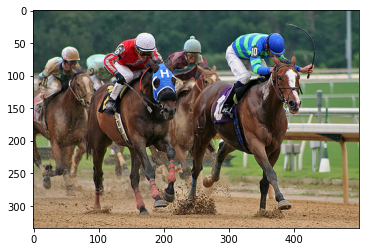

3601803640_5f3cb05acf.jpg
BLEU Score for image id : 3601803640_5f3cb05acf.jpgis : 0.4671379777282001
1 group of people are posing for picture


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


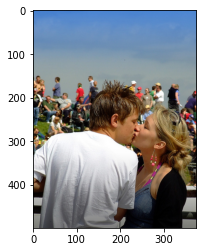

3601843201_4809e66909.jpg
BLEU Score for image id : 3601843201_4809e66909.jpgis : 0.5169731539571706
1 motorcycle rider is driving motorcycle in the air


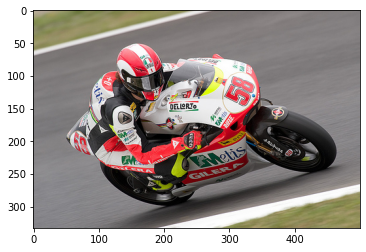

3601978895_9fec23ce0c.jpg
BLEU Score for image id : 3601978895_9fec23ce0c.jpgis : 0.6905911470987942
1 man is skateboarding down railing near large city


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


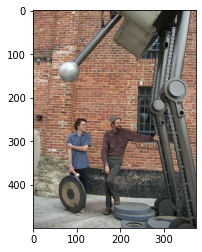

3602676311_824b2c04ba.jpg
BLEU Score for image id : 3602676311_824b2c04ba.jpgis : 0.5031747626530138
1 person on bike is jumping through the air while being watched by spectators


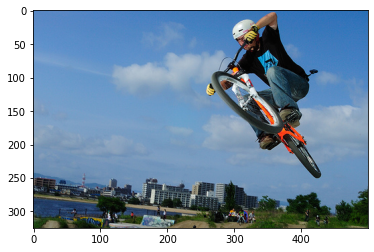

In [ ]:
scores=[]
for rn in range(5):
    img_id = list(encoding_test.keys())[rn]
    photo_enc = encoding_test[img_id].reshape((1,2048))
    sh_img_id=img_id[:-4]
    reference=new_dict[sh_img_id]
    references=[]
    print(img_id)

    for ref in reference:
        ref=ref[11:-9]
        ref=ref.split(' ')
        references.append(ref)
    pred = predict(photo_enc,model)
    translation=pred.split(' ')
    score1 = sentence_bleu(references, translation)
    scores.append(score1)
    print("BLEU Score for image id : "+img_id+"is : "+str(score1))
    print('1 '+ pred)
    path = images + img_id
    img = plt.imread(path)
    plt.imshow(img)
    plt.show()

   

In [ ]:
scores=[]
for rn in range(1619):
    img_id = list(encoding_test.keys())[rn]
    photo_enc = encoding_test[img_id].reshape((1,2048))
    sh_img_id=img_id[:-4]
    reference=new_dict[sh_img_id]
    references=[]

    for ref in reference:
        ref=ref[11:-9]
        ref=ref.split(' ')
        references.append(ref)
    pred = predict(photo_enc,model)
    translation=pred.split(' ')
    score1 = sentence_bleu(references, translation)
    scores.append(score1)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
scores

[0,
 0.4671379777282001,
 0.5169731539571706,
 0.6905911470987942,
 0.5031747626530138,
 0.4111336169005197,
 0.48268667553243755,
 0.7952707287670506,
 0.5506953149031838,
 0.36409302398068727,
 0.46173663094410267,
 0.7071067811865476,
 0.7071067811865476,
 0.6865890479690392,
 0.5166357204442371,
 0.4482700320176827,
 0.6348761284611546,
 0.6799308458396492,
 0.5169731539571706,
 0.5946035575013605,
 0.504898401358106,
 0.6865890479690392,
 0.4153509237206396,
 0.36889397323344053,
 0.5623413251903491,
 0.40564972433082536,
 0.33913260910307497,
 0.42383656282787796,
 0.6360188027707555,
 0.2790159393585827,
 0.6389431042462724,
 0.7598356856515925,
 0.6076795808137692,
 0.6548907866815301,
 0.4347208719449914,
 0.5773502691896258,
 0.4954150028307823,
 0.8210967436686386,
 0.5773502691896257,
 0.3004843884984905,
 0.6143868746168435,
 0,
 0,
 0.668740304976422,
 0.5773502691896257,
 0.5623413251903491,
 0.668740304976422,
 0.38363982298032945,
 0.7598356856515925,
 0.79527072876705

In [ ]:
from statistics import mean

print("Max : "+str(max(scores)))
print("Min : "+str(min(scores)))
print("Average : "+str(mean(scores)))


Max : 1.0
Min : 0
Average : 0.5550659968532692


###11-Model Evaluation 

In [87]:
dataset_testeval = pd.read_csv('/content/drive/MyDrive/Test Dataset/testcaptions.txt',delimiter=',',header=None)

In [88]:
dataset_testeval

0                                                  1
0    image                                            caption
1    1.jpg  A woman wearing a blue jacket is running in th...
2    2.jpg  A man wearing a blue shirt is running on a str...
3    3.jpg  A man wearing a white shirt and a women wearin...
4    4.jpg  A woman wearing a red shirt is running on the ...
5    5.jpg              Two women are running in the forest .
6    6.jpg  A woman wearing a pink dress is holding a dres...
7    7.jpg  A woman wearing a pink shirt is holding a whit...
8    8.jpg                       A woman buying a red shirt .
9    9.jpg  A woman wearing a red shirt is holding a red s...
10  10.jpg  A man wearing a face mask and a blue shirt is ...
11  11.jpg                      Two girls are playing chess .
12  12.jpg                           Two boys playing chess .
13  13.jpg                      Three old men playing chess .
14  14.jpg                        A young boy playing chess .
15  15.jpg  A man and a girl playing chess and shaking han...
16  16.jpg  A woman wearing a green shirt climbing a mount...
17  17.jpg  A man wearing a red jacket standing on a large...
18  18.jpg  Two people walking on a mountain covered with ...
19  19.jpg  A woman wearing a blue shirt is climbing a mou...
20  20.jpg                    Two people on top of mountain .
21  21.jpg  A woman holding a camera to take photos betwee...
22  22.jpg  A woman holding a camera to take photos near m...
23  23.jpg  A man wearing a jacket and holding a camera to...
24  24.jpg  A woman wearing and blue jacket and red hat is...
25  25.jpg  A man standing on a rock is using a camera to ...

In [89]:
import re
import nltk
corpus_2 = []

for i in range(1, dataset_testeval.shape[0]):

    cap = re.sub('[^a-zA-Z]', ' ', dataset_testeval[1][i])  #Removed all other characters except alphabets

    cap = cap.lower()                              #Converted to lower case

    cap = cap.split()                               

    cap=[word for word in cap if len(word)>1]      #Removed single letter words

    cap = ' '.join(cap)                            # Joined with spaces

    cap= '<startseq> '+cap+' <endseq>'

    corpus_2.append(cap) 

In [90]:
corpus_2

['<startseq> woman wearing blue jacket is running in the forest <endseq>',
 '<startseq> man wearing blue shirt is running on street near mountain <endseq>',
 '<startseq> man wearing white shirt and women wearing grey shirt is running on street near hill <endseq>',
 '<startseq> woman wearing red shirt is running on the bridge <endseq>',
 '<startseq> two women are running in the forest <endseq>',
 '<startseq> woman wearing pink dress is holding dress to shop <endseq>',
 '<startseq> woman wearing pink shirt is holding white dress to shop <endseq>',
 '<startseq> woman buying red shirt <endseq>',
 '<startseq> woman wearing red shirt is holding red shirt to shop <endseq>',
 '<startseq> man wearing face mask and blue shirt is holding shirt to shop <endseq>',
 '<startseq> two girls are playing chess <endseq>',
 '<startseq> two boys playing chess <endseq>',
 '<startseq> three old men playing chess <endseq>',
 '<startseq> young boy playing chess <endseq>',
 '<startseq> man and girl playing chess

In [91]:
from collections import defaultdict

new_dict_2= defaultdict(lambda : [])          #Created a dictionary with image ids as key and captions as value

i=1

while i <=len(corpus_2):

  # print(dataset[0][i])

  new_dict_2[dataset_testeval[0][i]].append(corpus_2[i-1])

  i=i+1   

In [92]:
new_dict_2

defaultdict(<function __main__.<lambda>>,
            {'1.jpg': ['<startseq> woman wearing blue jacket is running in the forest <endseq>'],
             '10.jpg': ['<startseq> man wearing face mask and blue shirt is holding shirt to shop <endseq>'],
             '11.jpg': ['<startseq> two girls are playing chess <endseq>'],
             '12.jpg': ['<startseq> two boys playing chess <endseq>'],
             '13.jpg': ['<startseq> three old men playing chess <endseq>'],
             '14.jpg': ['<startseq> young boy playing chess <endseq>'],
             '15.jpg': ['<startseq> man and girl playing chess and shaking hands <endseq>'],
             '16.jpg': ['<startseq> woman wearing green shirt climbing mountain <endseq>'],
             '17.jpg': ['<startseq> man wearing red jacket standing on large rock near mountain <endseq>'],
             '18.jpg': ['<startseq> two people walking on mountain covered with ice <endseq>'],
             '19.jpg': ['<startseq> woman wearing blue shirt is cl

In [93]:
image_ids_testeval=[]

j=1

for i in range(1,len(dataset_testeval) ):

    image_ids_testeval.append(dataset_testeval[0][j])

    j=j+1

In [94]:
image_ids_testeval

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg']

In [95]:
new_dict_2[image_ids_testeval[0]]

['<startseq> woman wearing blue jacket is running in the forest <endseq>']

In [96]:
testeval=image_ids_testeval

In [97]:
testeval

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg']

In [98]:
testeval_descriptions = {}             #dictionary with keys as image ids and values as corresponding captions

for t in testeval:

    testeval_descriptions[t] = []

    for cap in new_dict_2[t]:

        testeval_descriptions[t].append(cap)

In [99]:
testeval_descriptions

{'1.jpg': ['<startseq> woman wearing blue jacket is running in the forest <endseq>'],
 '10.jpg': ['<startseq> man wearing face mask and blue shirt is holding shirt to shop <endseq>'],
 '11.jpg': ['<startseq> two girls are playing chess <endseq>'],
 '12.jpg': ['<startseq> two boys playing chess <endseq>'],
 '13.jpg': ['<startseq> three old men playing chess <endseq>'],
 '14.jpg': ['<startseq> young boy playing chess <endseq>'],
 '15.jpg': ['<startseq> man and girl playing chess and shaking hands <endseq>'],
 '16.jpg': ['<startseq> woman wearing green shirt climbing mountain <endseq>'],
 '17.jpg': ['<startseq> man wearing red jacket standing on large rock near mountain <endseq>'],
 '18.jpg': ['<startseq> two people walking on mountain covered with ice <endseq>'],
 '19.jpg': ['<startseq> woman wearing blue shirt is climbing mountain <endseq>'],
 '2.jpg': ['<startseq> man wearing blue shirt is running on street near mountain <endseq>'],
 '20.jpg': ['<startseq> two people on top of mountain

In [100]:
images='/content/drive/MyDrive/Test Dataset/testimages/'

In [101]:
def encode_image(img):
    img = preprocess_image(img)
    fea_vec = model_new.predict(img)
    fea_vec = fea_vec.reshape(fea_vec.shape[1], )
    return fea_vec

In [102]:
 # Obtaining Feature vector from test images



start = time.time()



encoding_testeval = {}



for ix, img in enumerate(testeval):

    

    img = images+testeval[ix]

    

    p = encode_image(img)

    

    encoding_testeval[ img[len(images):] ] = p

    

    

    if ix%1 == 0:

        print("Encoding image :" + str(ix))

    

print("Time taken in sec - " + str(time.time() - start))

Encoding image :0
Encoding image :1
Encoding image :2
Encoding image :3
Encoding image :4
Encoding image :5
Encoding image :6
Encoding image :7
Encoding image :8
Encoding image :9
Encoding image :10
Encoding image :11
Encoding image :12
Encoding image :13
Encoding image :14
Encoding image :15
Encoding image :16
Encoding image :17
Encoding image :18
Encoding image :19
Encoding image :20
Encoding image :21
Encoding image :22
Encoding image :23
Encoding image :24
Time taken in sec - 8.490658521652222


In [103]:
len(encoding_testeval)

25

In [104]:

for rn in range(25):

    img_id = list(encoding_testeval.keys())[rn]

    photo_enc = encoding_testeval[img_id].reshape((1,2048))

    sh_img_id=img_id[0:25]

  #  for i in range(1,25):

    pred = predict(photo_enc,model)
    print(pred)

woman in sweater is walking along road with two cameras
man in black shirt and black pants is running on track
two young boys are running race on track
man and woman are posing for picture
man in yellow shirt is standing on tree trunk
group of people are sitting at tables with drinks at the table
group of people are posing for picture
two women in black are standing in front of building
man and woman are showing their direction picture
man in black shirt and tie talks on his head
man and woman are sitting on bench
man is standing in front of an old
man with woman dressed in black and woman in white shirt are sitting on stone wall
two young girls are posing for picture
man and woman are biting the head
person in blue and white climbs rock cliff
three people are posing on top of rock ledge
people surf down snowy mountain
man rock climbing
man is rock climbing overlooking valley
man with his arm around his neck
man and woman are posing for picture
man with shaved head is standing next to 

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU Score for image id : 1.jpgis : 0.5623413251903491
1 woman in sweater is walking along road with two cameras


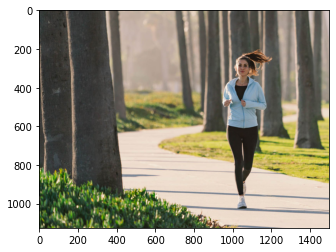

BLEU Score for image id : 2.jpgis : 0.5491004867761125
1 man in black shirt and black pants is running on track


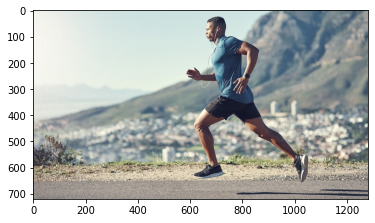

BLEU Score for image id : 3.jpgis : 0
1 two young boys are running race on track


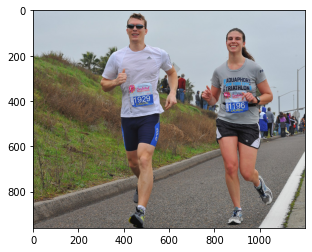

BLEU Score for image id : 4.jpgis : 0.6147881529512643
1 man and woman are posing for picture


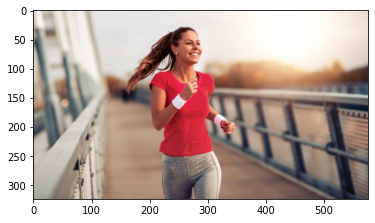

BLEU Score for image id : 5.jpgis : 0
1 man in yellow shirt is standing on tree trunk


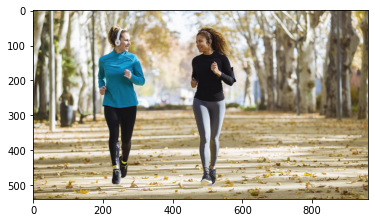

BLEU Score for image id : 6.jpgis : 0
1 group of people are sitting at tables with drinks at the table


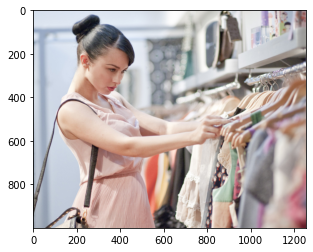

BLEU Score for image id : 7.jpgis : 0
1 group of people are posing for picture


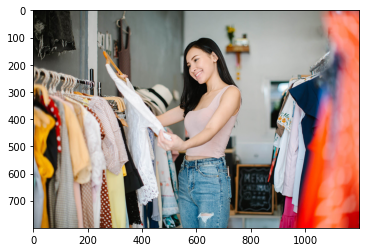

BLEU Score for image id : 8.jpgis : 0
1 two women in black are standing in front of building


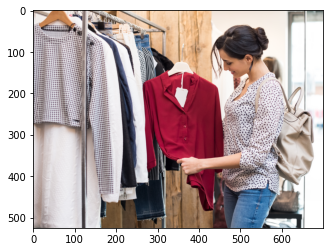

BLEU Score for image id : 9.jpgis : 0.5946035575013605
1 man and woman are showing their direction picture


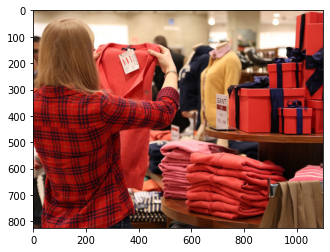

BLEU Score for image id : 10.jpgis : 0.5623413251903491
1 man in black shirt and tie talks on his head


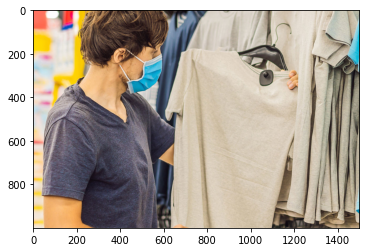

BLEU Score for image id : 11.jpgis : 0.6147881529512643
1 man and woman are sitting on bench


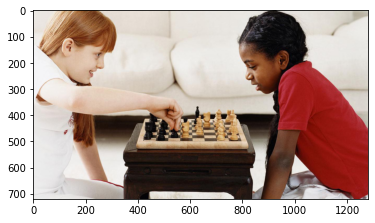

BLEU Score for image id : 12.jpgis : 0
1 man is standing in front of an old


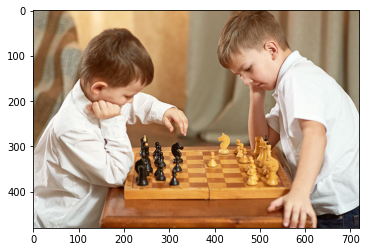

BLEU Score for image id : 13.jpgis : 0
1 man with woman dressed in black and woman in white shirt are sitting on stone wall


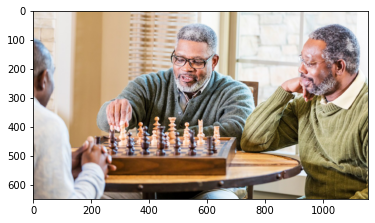

BLEU Score for image id : 14.jpgis : 0.6147881529512643
1 two young girls are posing for picture


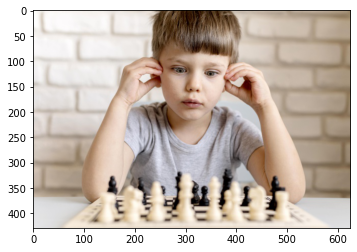

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU Score for image id : 15.jpgis : 0.4671379777282001
1 man and woman are biting the head


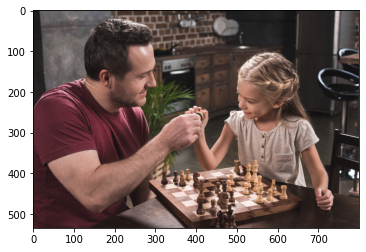

BLEU Score for image id : 16.jpgis : 0
1 person in blue and white climbs rock cliff


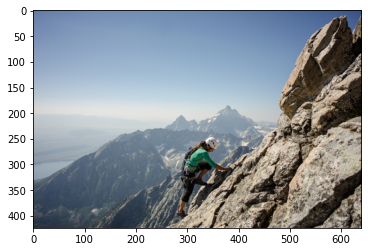

BLEU Score for image id : 17.jpgis : 0
1 three people are posing on top of rock ledge


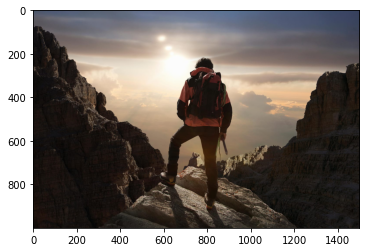

BLEU Score for image id : 18.jpgis : 0.668740304976422
1 people surf down snowy mountain


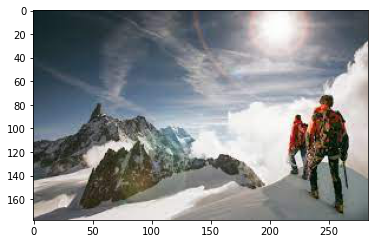

BLEU Score for image id : 19.jpgis : 0
1 man rock climbing


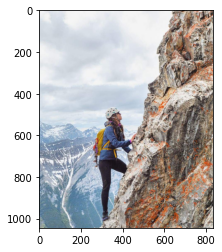

BLEU Score for image id : 20.jpgis : 0
1 man is rock climbing overlooking valley


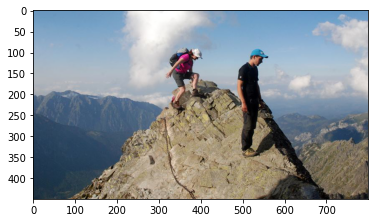

BLEU Score for image id : 21.jpgis : 0
1 man with his arm around his neck


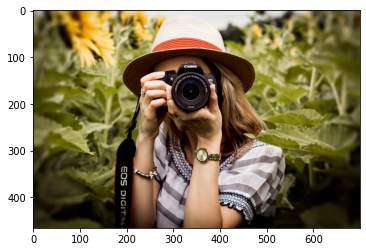

BLEU Score for image id : 22.jpgis : 0.6147881529512643
1 man and woman are posing for picture


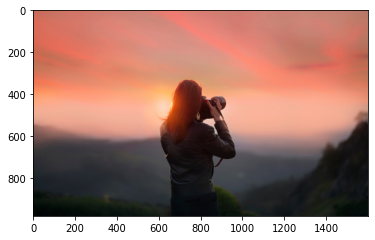

BLEU Score for image id : 23.jpgis : 0.537284965911771
1 man with shaved head is standing next to woman with black jacket


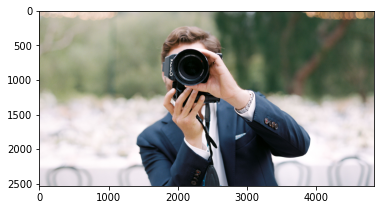

BLEU Score for image id : 24.jpgis : 0
1 man with his arm around his head


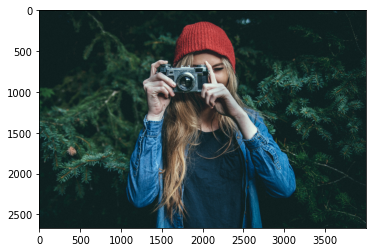

BLEU Score for image id : 25.jpgis : 0.5946035575013605
1 man in yellow pants is climbing over rock


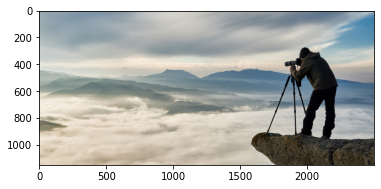

In [105]:
scores=[]

for rn in range(25):

    img_id = list(encoding_testeval.keys())[rn]

    photo_enc = encoding_testeval[img_id].reshape((1,2048))

    sh_img_id=img_id[0:25]

    reference=new_dict_2[sh_img_id]

    references=[]



    for ref in reference:

        ref=ref[1:25]

        ref=ref.split(' ')

        references.append(ref)
  

    pred = predict(photo_enc,model)
    


    translation=pred.split(' ')

    score1 = sentence_bleu(references, translation)

    scores.append(score1)
     

    print("BLEU Score for image id : "+img_id+"is : "+str(score1))

    print('1 '+ pred)

    path = images + img_id

    img = plt.imread(path)

    plt.imshow(img)

    plt.show()


In [106]:
scores

[0.5623413251903491,
 0.5491004867761125,
 0,
 0.6147881529512643,
 0,
 0,
 0,
 0,
 0.5946035575013605,
 0.5623413251903491,
 0.6147881529512643,
 0,
 0,
 0.6147881529512643,
 0.4671379777282001,
 0,
 0,
 0.668740304976422,
 0,
 0,
 0,
 0.6147881529512643,
 0.537284965911771,
 0,
 0.5946035575013605]

In [107]:
from statistics import mean



print("Max : "+str(max(scores)))

print("Min : "+str(min(scores)))

print("Average : "+str(mean(scores)))

Max : 0.668740304976422
Min : 0
Average : 0.27981224450323927
